In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
max_quests = 28
all_quests = tuple(map(lambda x: f'Q{x}', range(1, max_quests+1)))

def plot_column_count(df, col):
    results = df.groupby(col).agg({col: 'count'}).rename(columns={col: 'count'})
    columns = results.index
    values = results['count'].to_numpy()
    plt.bar(columns, values, label='count')
    plt.xticks(columns)
    plt.legend()
    plt.title(f'Distribution of "{col}"')

First, let's analyze some of the columns for unique values and so on

This will give us an insight on the data

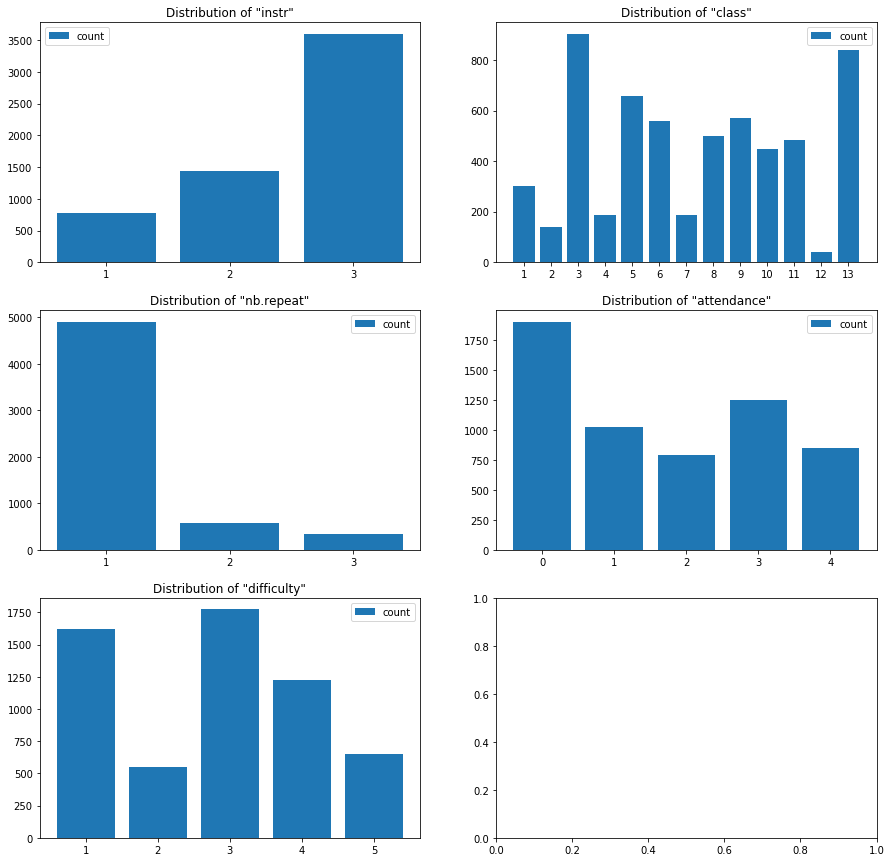

In [33]:
rows = 3
cols = 2
plt.subplots(rows, cols, figsize=(15, 15))

plt.subplot(rows, cols, 1)
plot_column_count(df, 'instr')
plt.subplot(rows, cols, 2)
plot_column_count(df, 'class')
plt.subplot(rows, cols, 3)
plot_column_count(df, 'nb.repeat')
plt.subplot(rows, cols, 4)
plot_column_count(df, 'attendance')
plt.subplot(rows, cols, 5)
plot_column_count(df, 'difficulty')

In [35]:
df.groupby('instr').agg({'class': ['unique', 'count']})

class      
                        unique count
instr                               
1                   [2, 7, 10]   775
2               [1, 6, 11, 13]  1444
3      [3, 4, 5, 8, 9, 12, 13]  3601

As we can see from the previous grouping, class 13 is shared between 2 teachers.

#### Let's see how the data varies between teachers.

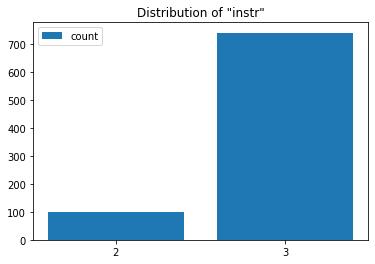

In [44]:
plot_column_count(df[df['class'] == 13], 'instr')

As it can be seen, the difference between them is very huge, thus making any statement would be inaccurate.

#### Let's see how many people from class 13 from each teacher has repeated

In [72]:
total = df[(df['class'] == 13)].groupby('instr').agg({'class': 'count'})
failed = df[(df['class'] == 13) & (df['nb.repeat'] > 1)].groupby('instr').agg({'class': 'count'})
perc = failed / total
failed.join(total, lsuffix='_failed', rsuffix='_total').join(perc).rename(columns={'class': 'failure_percentage'})

,class_failed,class_total,failure_percentage
instr,,,
2,5,99,0.050505
3,185,742,0.249326


And again, the difference is insignificant in regards with the difference in the total number of students.

In [22]:
# -1 if x < 3 else 0 if x == 3 else 1; map question answers to values (-1, 0, 1)
# df['Q1'].map(lambda x: (x-2)/2).value_counts()

# remap answers to (-1, -0.5, 0, 0.5, 1)
for q in all_quests:
    df[q] = df[q].map(lambda x: (x-2)/2)


In [26]:
# we can again see that the failure rate is almost the same, taking into consideration that the number of students
# is very different
total = df.groupby('instr').agg({'class': 'count'})
failed = df[(df['nb.repeat'] > 1)].groupby('instr').agg({'class': 'count'})
perc = failed / total
failed.join(total, lsuffix='_failed', rsuffix='_total').join(perc).rename(columns={'class': 'failure_percentage'})

,class_failed,class_total,failure_percentage
instr,,,
1,70,775,0.090323
2,153,1444,0.105956
3,688,3601,0.191058


In [34]:
# let's have a look at the failure per class
total = df.groupby('class').agg({'class': 'count'})
failed = df[(df['nb.repeat'] > 1)].groupby('class').agg({'class': 'count'})
perc = failed / total
failed.join(total, lsuffix='_failed', rsuffix='_total').join(perc).rename(columns={'class': 'failure_percentage'})\
    .sort_values(by='failure_percentage', ascending=False)

,class_failed,class_total,failure_percentage
class,,,
9,171,571,0.299475
8,121,500,0.242000
13,190,841,0.225922
7,37,187,0.197861
4,33,187,0.176471
12,7,41,0.170732
3,126,904,0.139381
6,64,558,0.114695
11,53,484,0.109504


#### It can be seen that class `9` has the highest failure percentage and class `10` has the lowest
Let's analyze their attendace and difficulty results

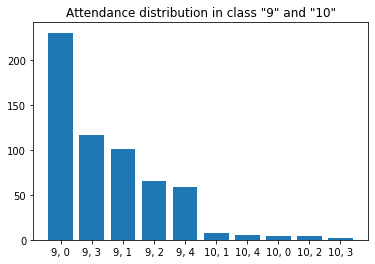

In [72]:
data = df[(df['class'] == 9) | (df['class'] == 10) & (df['nb.repeat'] > 1)].groupby('class')['attendance'].value_counts()
x = np.array(list(map(lambda x: f'{x[0]}, {x[1]}', data.index)))
y = data.values
plt.bar(x, y)
_ = plt.title('Attendance distribution in class "9" and "10"')

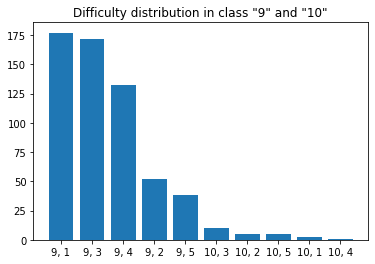

In [71]:
data = df[(df['class'] == 9) | (df['class'] == 10) & (df['nb.repeat'] > 1)].groupby('class')['difficulty'].value_counts()
x = np.array(list(map(lambda x: f'{x[0]}, {x[1]}', data.index)))
y = data.values
plt.bar(x, y)
_ = plt.title('Difficulty distribution in class "9" and "10"')